In [119]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [154]:
def invertion(x):
    matrix=[]
    X = torch.tensor(x[1,:])
    Y = torch.tensor(x[0,:])
    i=0
    while i < len(X) - 2:   
        row = [0] * len(X)
        row[i] = -1       
        row[i+1] = 2       
        row[i+2] = -1     
        matrix.append(row)
        i += 1

    res = X*torch.tensor(matrix)
    ans = res.sum(dim=1)
    inver = sum([i<0 for i in ans])

    return inver
    
invertion_transform = FunctionTransformer(func=invertion,validate=True)
# x = np.array([
#     [10,20,30,40,50,60],
#     [1,2,3,4,5,6],
#     ])
x = np.array([
    [0,10,-10,11,15,34,-3],
    [0,1,2,3,4,5,6]
    ])
ans = invertion_transform.transform(x)
print(ans)

tensor(0)


calcuating invetions in inflation data set 


In [121]:
file = "./data/infaltion.csv"
df = pd.read_csv(file,sep=',',header=0)
df = df.sort_values('Year')


number of invertions 0


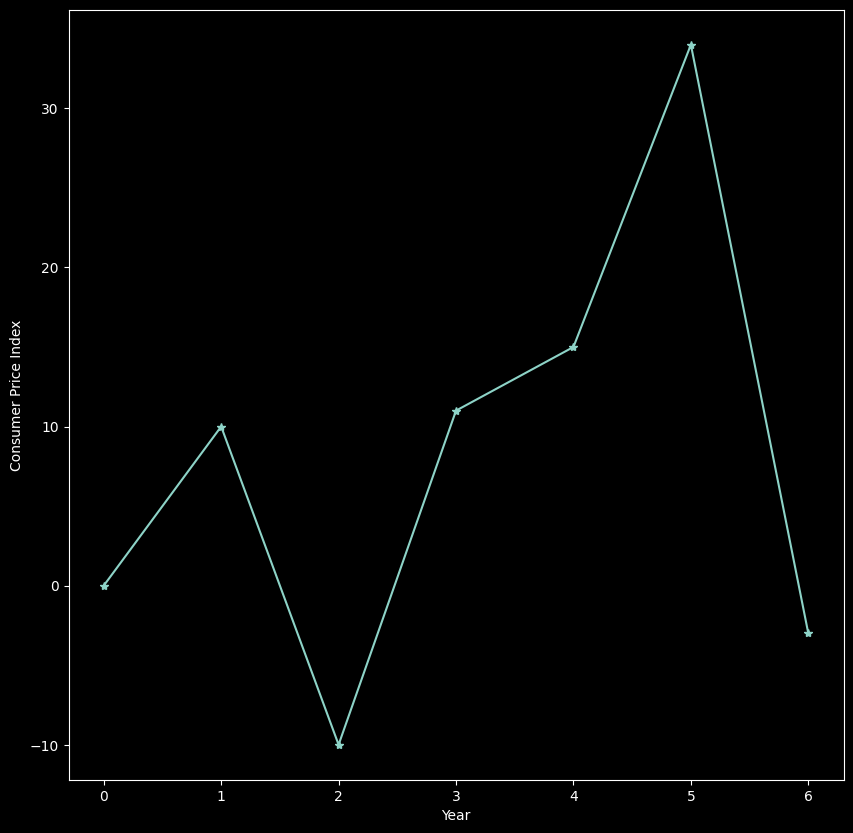

In [ ]:
country = input()
Years = 40
data = df[df.Code==country]

X = data.iloc[:Years,-2].values
Y = data.iloc[:Years,-1].values

fig,one = plt.subplots(1,1,figsize=(10,10))
index = range(len(X))
one.set_title(f'Inflation graph ({country})')
one.set_ylabel('Consumer Price Index')
one.set_xlabel('Year')
one.plot(X,Y,marker="*")

invertion_transform = FunctionTransformer(func=invertion,validate=True)
datamatrix = []
datamatrix.append(Y)
datamatrix.append(X)
result = invertion_transform.transform(datamatrix)
print(f'number of invertions {result}')

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_csv(path, x_col, y_col):
    # Load data
    df = pd.read_csv(path)
    df = df.sort_values(x_col)

    # x = df[x_col].values
    # y = df[y_col].values
    y = [10,20,11,40,50,23]
    x = [0,1,2,3,4,5]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker="o")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.show()

    # --- Analysis ---
    diffs = np.diff(y)   # changes between points
    trend = np.sign(diffs)

    # Basic analysis
    if np.all(trend >= 0):
        return "The graph is strictly increasing."
    elif np.all(trend <= 0):
        return "The graph is strictly decreasing."
    else:
        # Count direction changes
        changes = np.sum(trend[1:] != trend[:-1])
        if changes == 0:
            return "The graph is mostly flat."
        elif changes < len(trend) * 0.2:
            return f"The graph has {changes} direction changes, mostly monotonic with some fluctuations."
        else:
            return f"The graph is wiggly with {changes} ups and downs."


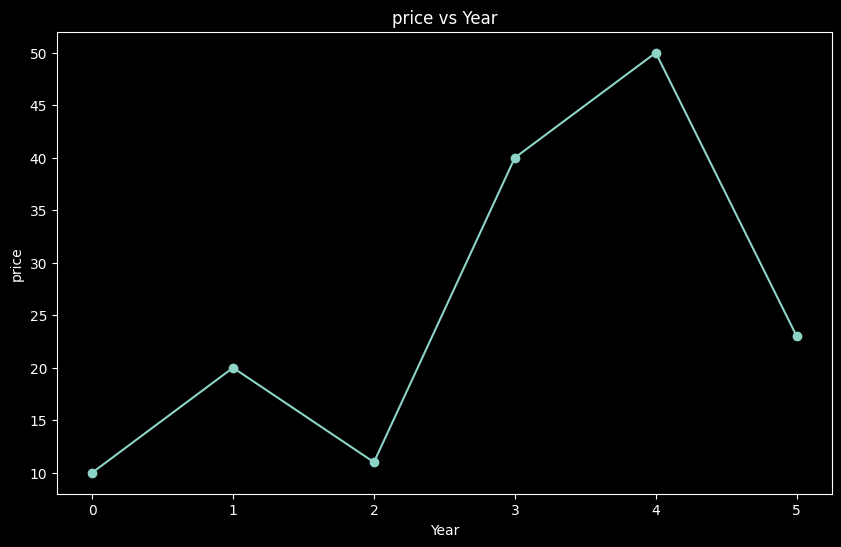

The graph is wiggly with 3 ups and downs.


In [ ]:
result = analyze_csv("./data/infaltion.csv", "Year", "price")
print(result)

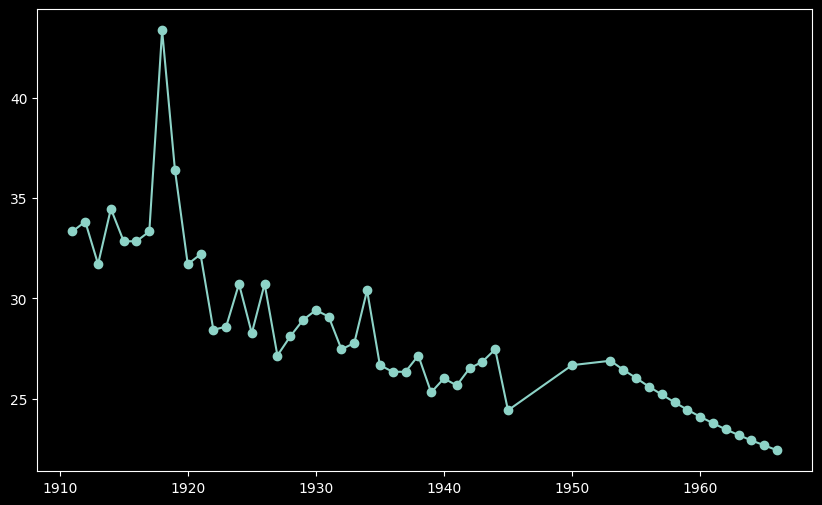

tensor(1)


In [182]:
datamatrix = []
data = pd.read_csv('./data/child-mortality.csv')
country = 'IND'
data = data[data.iloc[:,1]==country]
X = data.iloc[:50,-2]
Y = data.iloc[:50,-1]
datamatrix.append(Y)
datamatrix.append(X)

plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker="o")
# plt.xlabel(x_col)
# plt.ylabel(y_col)
# plt.title(f"{y_col} vs {x_col}")
plt.show()


res = invertion_transform.transform(datamatrix)
print(res)